In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from sklearn.cluster import KMeans

# Point Color

In [ ]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[kmeans.labels_ == i, 0],
             X[kmeans.labels_ == i, 1], '.')
    plt.plot(kmeans.cluster_centers_[i, 0],
             kmeans.cluster_centers_[i, 1], '*', markersize=10, c='r')
plt.show()

# Dominant Color

In [ ]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 1000)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[kmeans.labels_ == i, 0],
             X[kmeans.labels_ == i, 1], '.')
    plt.plot(kmeans.cluster_centers_[i, 0],
             kmeans.cluster_centers_[i, 1], '*', markersize=10, c='r')
plt.show()

# Finding Point Color

In [ ]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2)/10, 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2)/10, 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [ ]:
def k_means(X, k, n_iter = 10, verbose=False):
    mu = np.array([np.linspace(0, 5, k),
                   np.linspace(0, 5, k)]).T
    prev_mu = mu.copy()
    c = np.empty(k, dtype=object)
    A = X.copy()
    dist = np.empty([X.shape[0], k])
    
    # plot initiate point
    for i in range(k):
        dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)
        
    min_idx_matrix = np.argmin(dist, axis=1)
    for i in range(k):
        c[i] = np.where(min_idx_matrix == i)[0]
    if verbose:
        print(mu)
        plt.figure(figsize=(10, 6))
        for i in range(k):
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    # k-means
    for iteration in range(n_iter):
        for i in range(k):
            dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)

        min_idx_matrix = np.argmin(dist, axis=1)
        for i in range(k):
            c[i] = np.where(min_idx_matrix == i)[0]
            mu[i] = np.mean(A[c[i]], axis=0)

        if verbose:
            print("iter : {}\nAvg of dist : {}".format(iteration, np.mean(dist)))
            plt.figure(figsize=(10, 6))
            for i in range(k):
                print("mu[{}] : {}".format(i, mu[i]))
                plt.plot(X[c[i], 0],
                         X[c[i], 1], '.')
                plt.plot(prev_mu[i, 0],
                         prev_mu[i, 1], '*', markersize=10, c='y')
                plt.plot(mu[i, 0],
                         mu[i, 1], '*', markersize=10, c='r')
            plt.show()
            prev_mu = mu.copy()
            
    if not verbose:
        plt.figure(figsize=(10, 6))
        for i in range(k):
            print("mu[{}] : {}".format(i, mu[i]))
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    return mu, c

In [ ]:
k = 2
kmu, kc = k_means(X, k, verbose=True)

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[kc[i], 0],
             X[kc[i], 1], '.')
    plt.plot(kmu[i, 0],
             kmu[i, 1], '*', markersize=10, c='r')
plt.show()

# kp-means

(2100, 2)


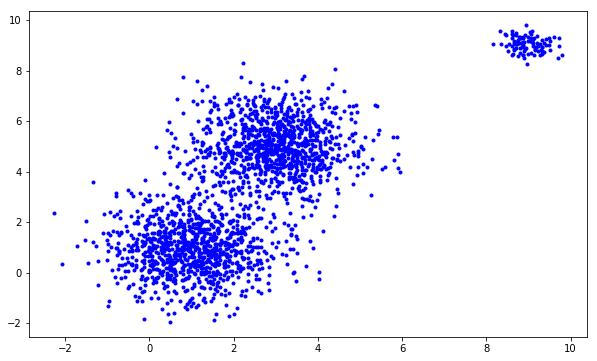

In [34]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [35]:
def kp_means(X, k, p, n_iter = 30, verbose=False):
    mu = np.array([np.linspace(0.1, 1, k),
                   np.linspace(0.1, 1, k)]).T
    
    prev_mu = mu.copy()
    
    c = np.empty(k, dtype=object)
    A = X.copy()
    dist = np.empty([X.shape[0], k])
    
    # plot initiate point
    for i in range(k):
        dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)
        
    min_idx_matrix = np.argmin(dist, axis=1)
    for i in range(k):
        c[i] = np.where(min_idx_matrix == i)[0]
    if verbose:
        print(mu)
        plt.figure(figsize=(10, 6))
        for i in range(k):
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    # kp-means
    for iteration in range(n_iter):
        for i in range(k):
            dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)

        min_idx_matrix = np.argmin(dist, axis=1)
        for i in range(0, k-p):
            c[i] = np.where(min_idx_matrix == i)[0]
            mu[i] = np.mean(A[c[i]], axis=0)

        for i in range(k-p, k):
            c[i] = np.where(min_idx_matrix == i)[0]
            ci_dist = dist[c[i], i].copy().reshape(-1,1)
            w = np.exp(ci_dist)/np.sum(np.exp(ci_dist))
            # w*A[c[i]] elemental wise multiplication
            mu[i] = np.sum(w[:,0]*A[c[i]], axis=0)    

        if verbose:
            print("iter : {}\nAvg of dist : {}".format(iteration, np.mean(dist)))
            plt.figure(figsize=(10, 6))
            for i in range(k):
                print("mu[{}] : {}".format(i, mu[i]))
                plt.plot(X[c[i], 0],
                         X[c[i], 1], '.')
                plt.plot(prev_mu[i, 0],
                         prev_mu[i, 1], '*', markersize=10, c='y')
                plt.plot(mu[i, 0],
                         mu[i, 1], '*', markersize=10, c='r')
            plt.show()
            prev_mu = mu.copy()
            
            
    if not verbose:
        plt.figure(figsize=(10, 6))
        for i in range(k):
            print("mu[{}] : {}".format(i, mu[i]))
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    return mu, c

[[0.1 0.1]
 [1.  1. ]]


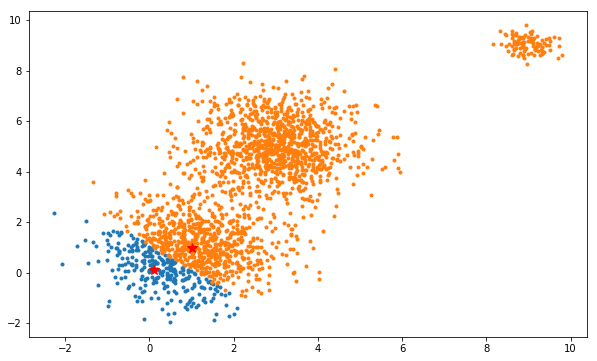

iter : 0
Avg of dist : 3.752338399419651
mu[0] : [0.18700386 0.05678977]
mu[1] : [8.93486548 9.03343456]


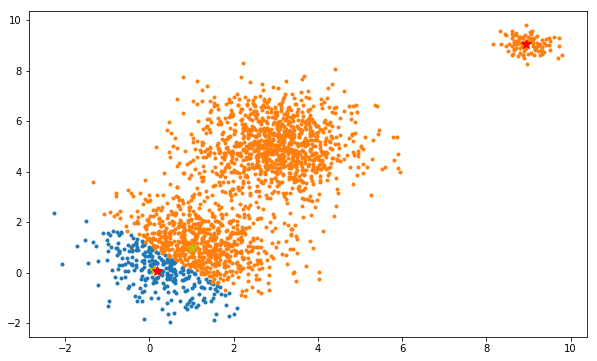

iter : 1
Avg of dist : 6.518645140912846
mu[0] : [1.76414792 2.61614796]
mu[1] : [3.55044802 6.10787274]


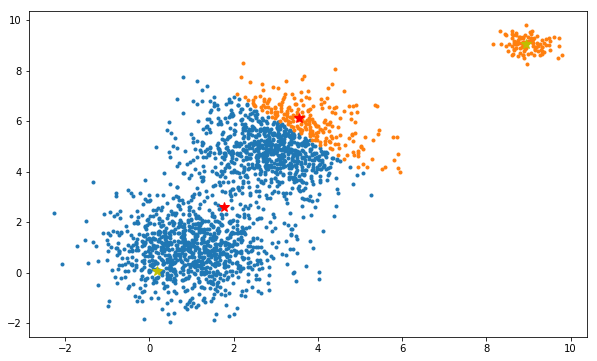

iter : 2
Avg of dist : 3.3650555016811357
mu[0] : [1.27008984 1.5001305 ]
mu[1] : [8.66582712 8.81296086]


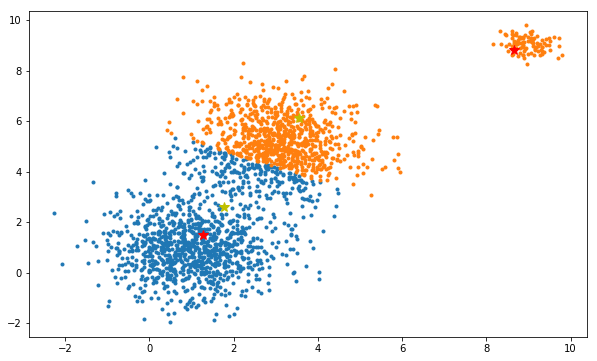

iter : 3
Avg of dist : 5.828871233060671
mu[0] : [1.92299278 2.88557302]
mu[1] : [4.09147053 6.67585579]


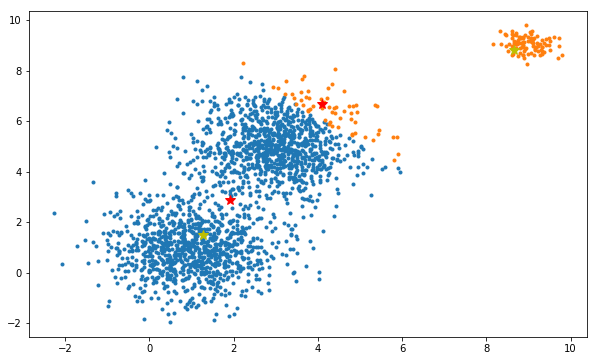

iter : 4
Avg of dist : 3.649547120903242
mu[0] : [1.47693825 1.92468783]
mu[1] : [8.29302746 8.60702996]


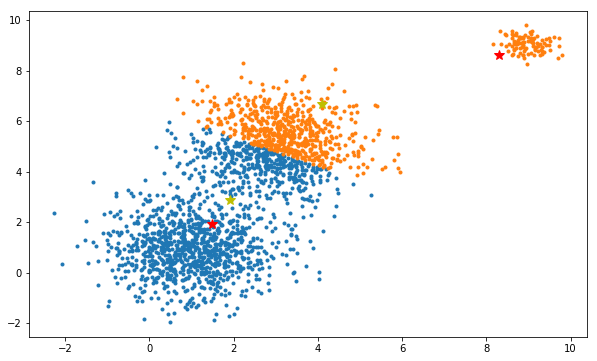

iter : 5
Avg of dist : 5.577001602148919
mu[0] : [1.92719331 2.89237487]
mu[1] : [4.21030299 6.76673275]


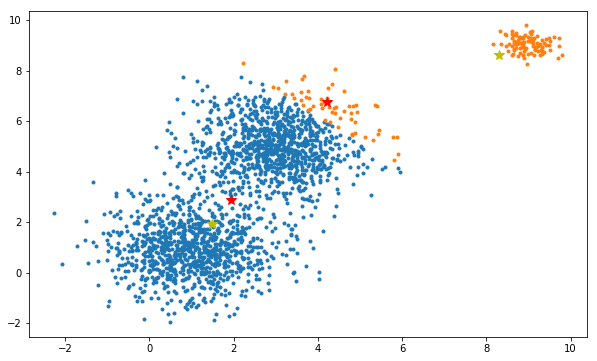

iter : 6
Avg of dist : 3.7068914047224713
mu[0] : [1.49804132 1.97254283]
mu[1] : [8.1549778  8.53144327]


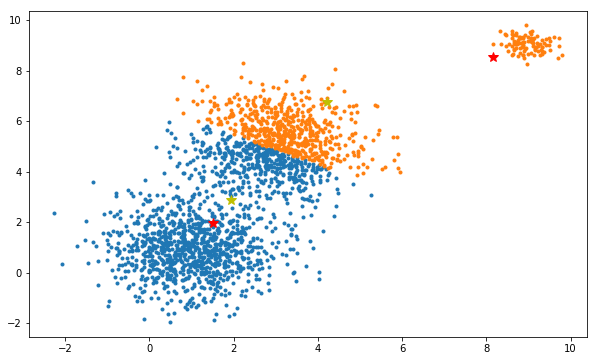

iter : 7
Avg of dist : 5.502652353119364
mu[0] : [1.91676927 2.87534507]
mu[1] : [4.17097324 6.70504824]


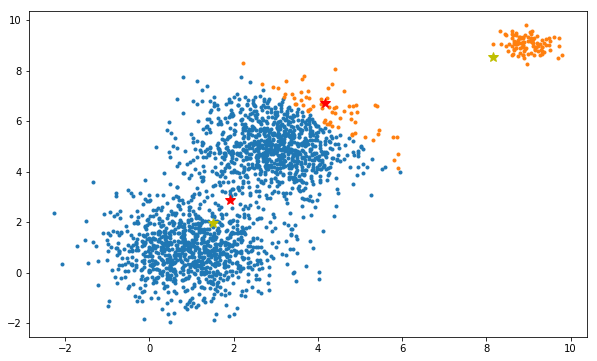

iter : 8
Avg of dist : 3.6769774758540676
mu[0] : [1.48375945 1.94692346]
mu[1] : [8.21309039 8.56398629]


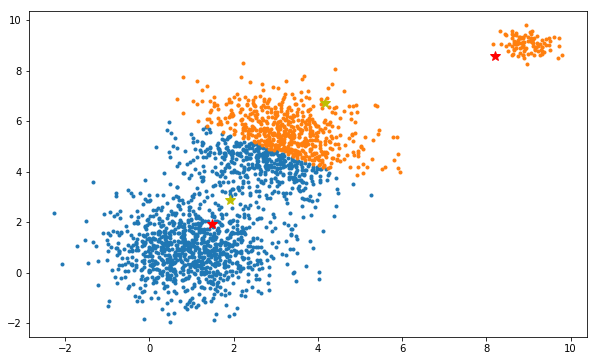

iter : 9
Avg of dist : 5.534897291769529
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.17055735 6.74336702]


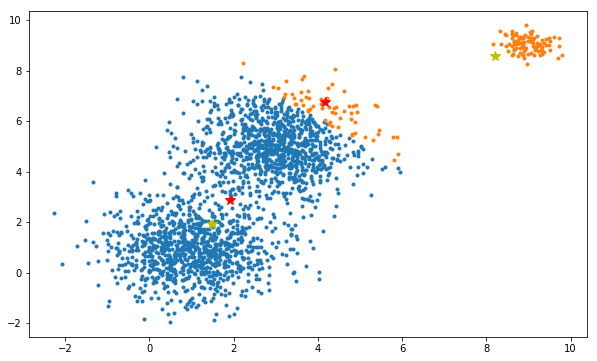

iter : 10
Avg of dist : 3.690430858182623
mu[0] : [1.48744553 1.95784577]
mu[1] : [8.20134932 8.55320542]


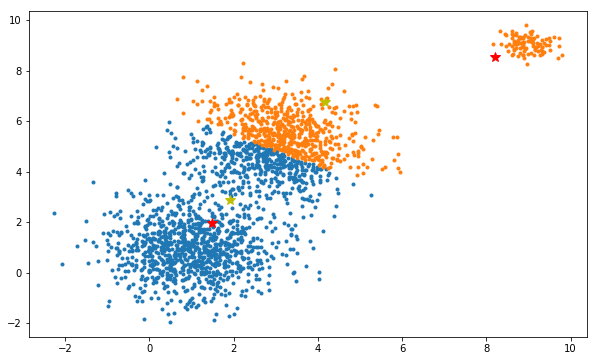

iter : 11
Avg of dist : 5.526585723893766
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.17572931 6.74681825]


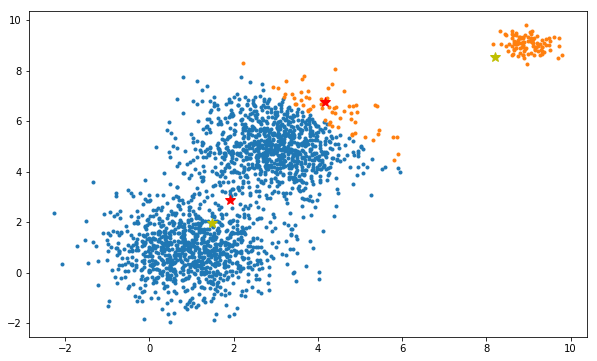

iter : 12
Avg of dist : 3.692766037158033
mu[0] : [1.48744553 1.95784577]
mu[1] : [8.19307878 8.54848327]


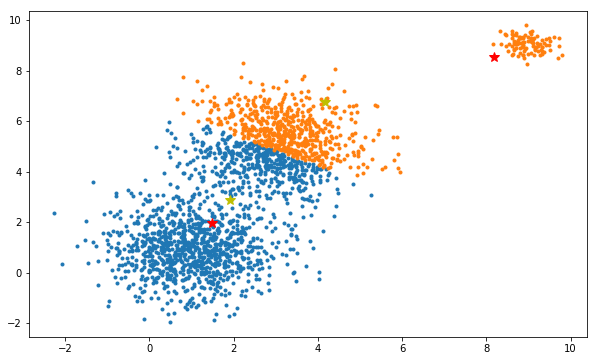

iter : 13
Avg of dist : 5.522407121285534
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.1793574  6.74860877]


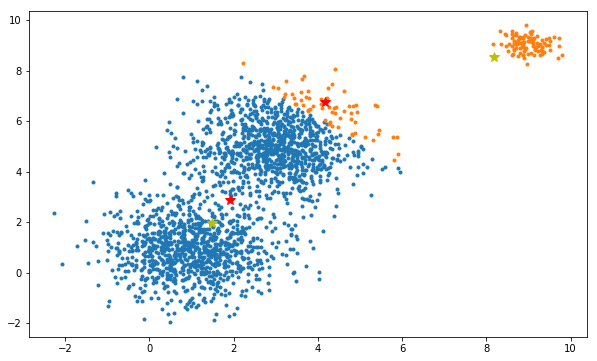

iter : 14
Avg of dist : 3.694177217728984
mu[0] : [1.48884725 1.95964149]
mu[1] : [8.18952655 8.54704519]


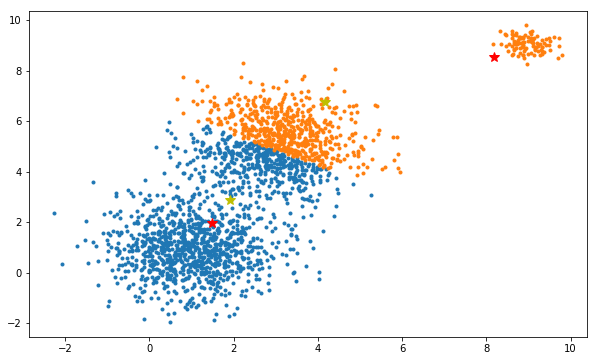

iter : 15
Avg of dist : 5.520546402921733
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.1809115  6.74924508]


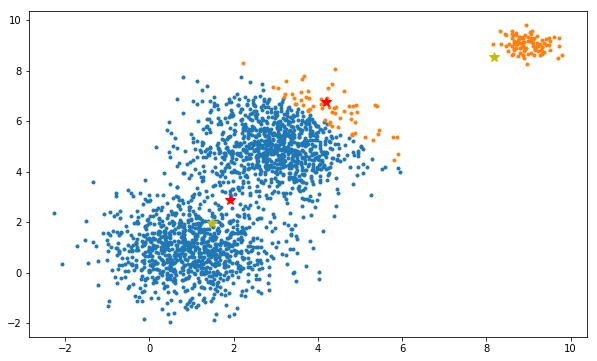

iter : 16
Avg of dist : 3.694734733360738
mu[0] : [1.48884725 1.95964149]
mu[1] : [8.18730426 8.54582107]


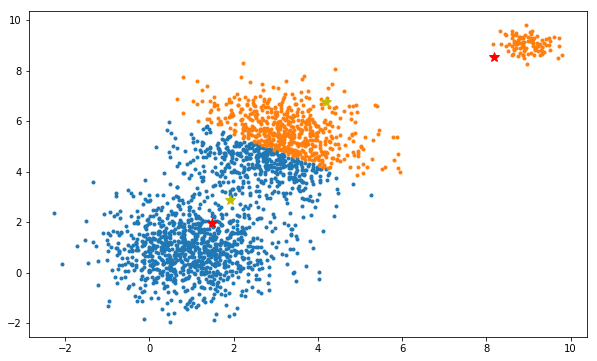

iter : 17
Avg of dist : 5.519436809722339
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.18190233 6.74972381]


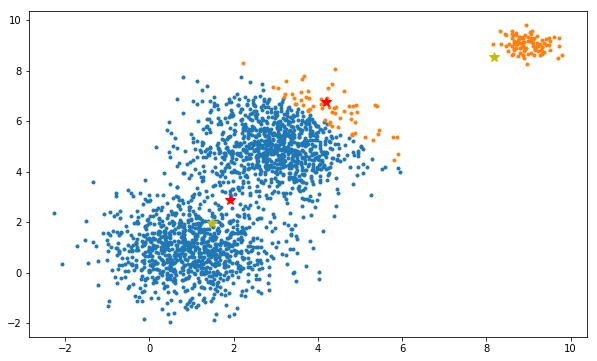

iter : 18
Avg of dist : 3.6951167051134735
mu[0] : [1.48884725 1.95964149]
mu[1] : [8.1858323  8.54500147]


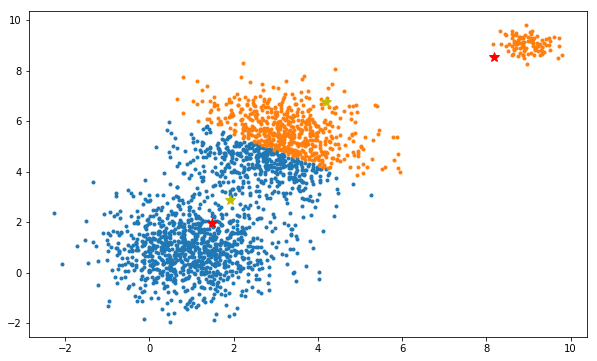

iter : 19
Avg of dist : 5.518699321586334
mu[0] : [1.91948551 2.88085142]
mu[1] : [4.21796737 6.69702633]


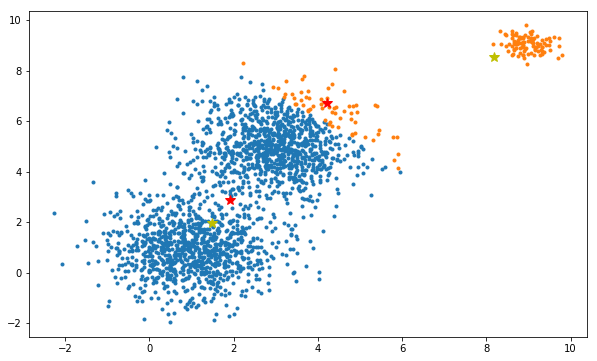

iter : 20
Avg of dist : 3.6839778630943996
mu[0] : [1.48578448 1.95620433]
mu[1] : [8.17805879 8.54754363]


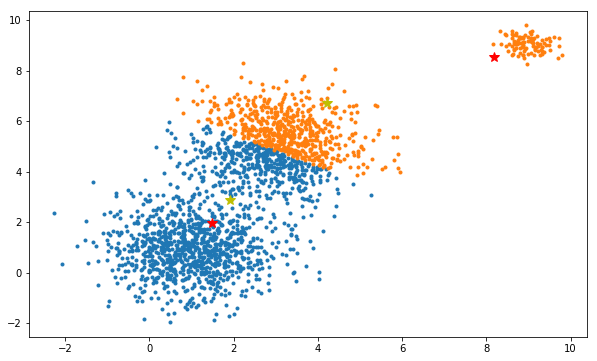

iter : 21
Avg of dist : 5.517282330501349
mu[0] : [1.91948551 2.88085142]
mu[1] : [4.22125961 6.69685673]


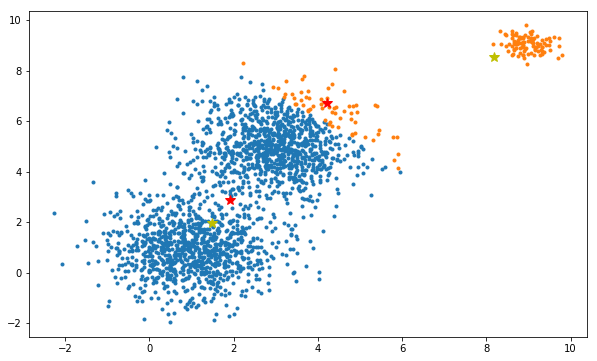

iter : 22
Avg of dist : 3.684631932530845
mu[0] : [1.48578448 1.95620433]
mu[1] : [8.17433699 8.54569364]


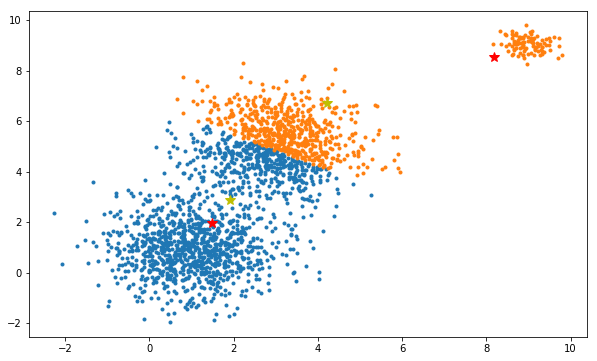

iter : 23
Avg of dist : 5.515482955506988
mu[0] : [1.91909882 2.87849127]
mu[1] : [4.16230884 6.72682714]


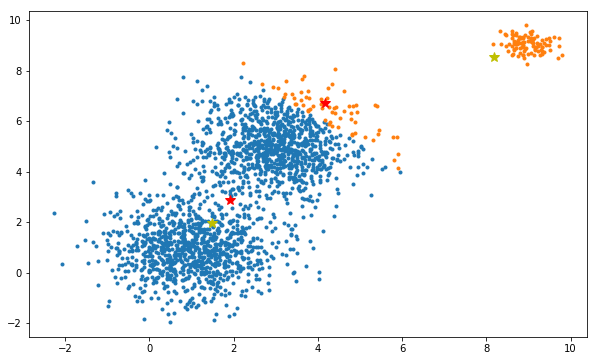

iter : 24
Avg of dist : 3.682856491179127
mu[0] : [1.4847104  1.94898351]
mu[1] : [8.20953752 8.55927912]


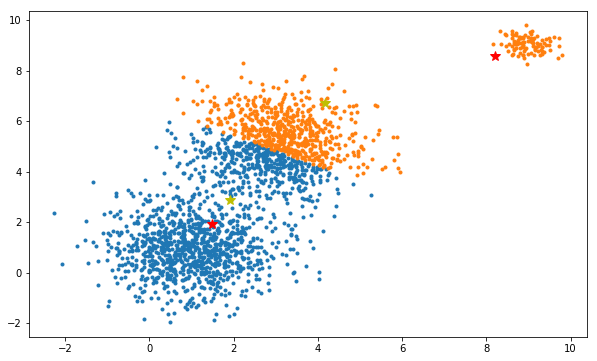

iter : 25
Avg of dist : 5.532082704550022
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.17215282 6.74474426]


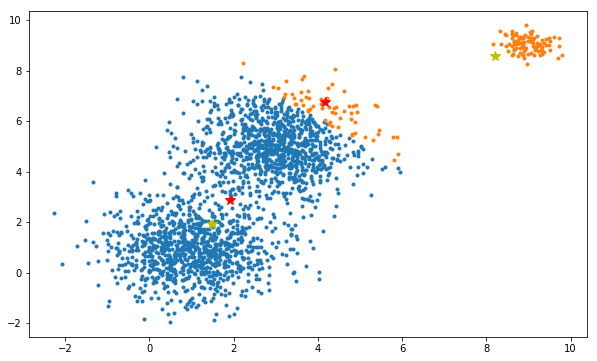

iter : 26
Avg of dist : 3.69126411393237
mu[0] : [1.48744553 1.95784577]
mu[1] : [8.19858404 8.55159314]


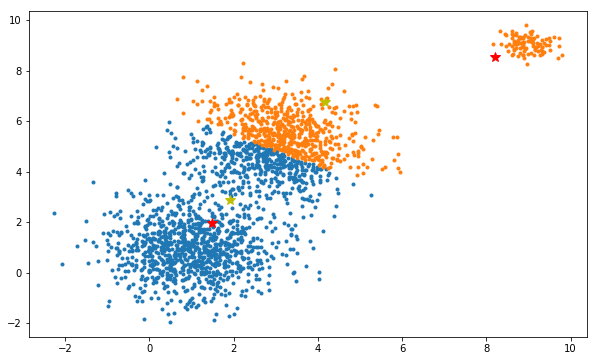

iter : 27
Avg of dist : 5.525178808574503
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.17693657 6.74742154]


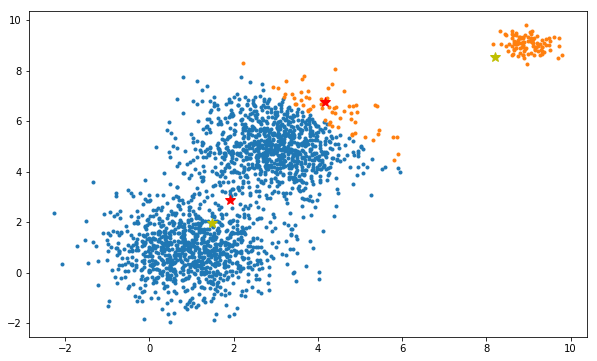

iter : 28
Avg of dist : 3.693238212993483
mu[0] : [1.48744553 1.95784577]
mu[1] : [8.19128234 8.54747935]


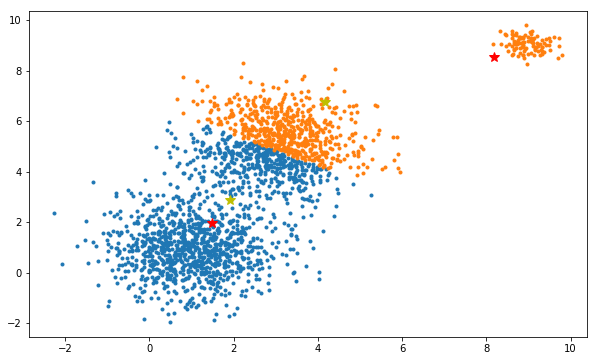

iter : 29
Avg of dist : 5.521505903179275
mu[0] : [1.92154712 2.88151133]
mu[1] : [4.180153   6.74899645]


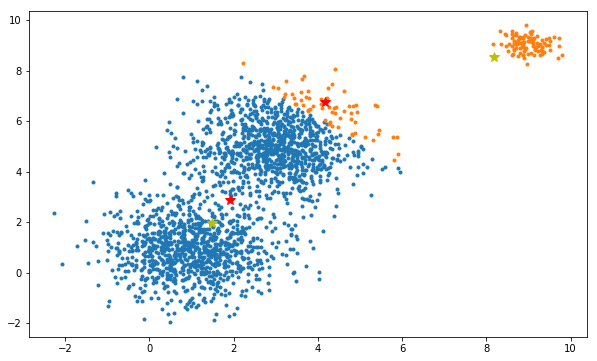

In [36]:
k = 2
p = 1
kpmu, kpc = kp_means(X, k, p, verbose=True)